### Create Infnet Collaboration Network with `one-touch` external 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

In [2]:
pd_poinf = pd.read_pickle('../data/lookup_poinf.pkl')

In [3]:
# Only need the institute_clas and id:
pd_poinf.drop(
    columns=['full_name', 'last_name', 'first_name', 'institute', 'alias'],
    inplace=True)

In [4]:
import cPickle as pkl
institutes = pkl.load(open('../data/institutes.pkl'))

In [5]:
institutes

{'UNKNOWN': 0,
 'centre for intelligent systems and their applications': 1,
 'deanery of clinical sciences': 8,
 'edinburgh neuroscience': 9,
 'institute for adaptive and neural computation': 4,
 'institute for computing systems architecture': 5,
 'institute of language cognition and computation': 2,
 'institute of perception action and behaviour': 7,
 'laboratory for foundations of computer science': 3,
 'neuroinformatics dtc': 6,
 'school of philosophy psychology and language sciences': 10}

In [6]:
# separate the individuals by community:
infcommunity = {}
gb = pd_poinf.groupby('institute_class')

In [7]:
for k, group in gb:
    infcommunity[k] = group
    className = [name for (name, _k) in institutes.items() if _k == k][0]
    print 'class {}-{}: {}'.format(k, className, len(group))

class 0-UNKNOWN: 50
class 1-centre for intelligent systems and their applications: 23
class 2-institute of language cognition and computation: 63
class 3-laboratory for foundations of computer science: 63
class 4-institute for adaptive and neural computation: 30
class 5-institute for computing systems architecture: 28
class 6-neuroinformatics dtc: 16
class 7-institute of perception action and behaviour: 20
class 8-deanery of clinical sciences: 1
class 9-edinburgh neuroscience: 1
class 10-school of philosophy psychology and language sciences: 1


***Note the unbalance of classes!***

In [8]:
len(pd_poinf)

296

In [9]:
# Generate a list of nodes id where the individuals are from school of informatics
poinf_id = set(pd_poinf.index)

In [10]:
# Import the dataset:
lookup_pub = pd.read_pickle(path='../data/lookup_pub.pkl')

In [11]:
all_edges = []
for listEdges in lookup_pub.edges:
    all_edges.extend(listEdges)

In [12]:
len(all_edges)

59522

In [13]:
# Filter all edges pairs if there is only one or none individuals from school of informatics
poinf_edges_only = [(au1, au2) for (au1, au2) in all_edges
                    if au1 in poinf_id  or au2 in poinf_id]

In [14]:
len(poinf_edges_only)

24546

### Graphing infnet

In [15]:
g_poinf_onetouch = nx.from_edgelist(poinf_edges_only)

In [16]:
pos = nx.spring_layout(g_poinf_onetouch)

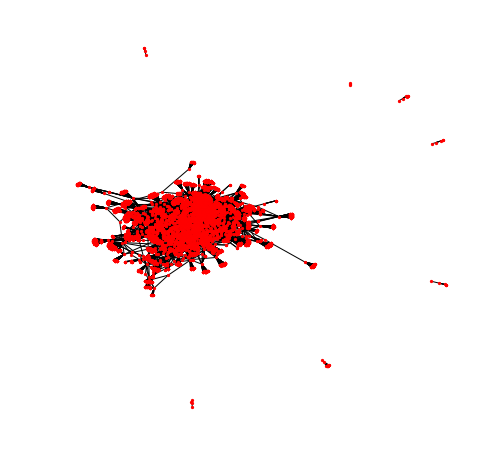

In [17]:
# Draw the graph:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
plt.axis('off')
nx.draw_networkx(g_poinf_onetouch, pos=pos, with_labels=False, ax=ax, node_size=5, )

In [18]:
print nx.info(g_poinf_onetouch)

Name: 
Type: Graph
Number of nodes: 7672
Number of edges: 11113
Average degree:   2.8970


#### Statistics for the full graph:

### Institute level:

In [27]:
# For color mapping
import matplotlib.colors as colors
import matplotlib.cm as cmx

In [37]:
institutes['external individuals'] = outside

In [38]:
institutes

{'UNKNOWN': 0,
 'centre for intelligent systems and their applications': 1,
 'deanery of clinical sciences': 8,
 'edinburgh neuroscience': 9,
 'external individuals': 11,
 'institute for adaptive and neural computation': 4,
 'institute for computing systems architecture': 5,
 'institute of language cognition and computation': 2,
 'institute of perception action and behaviour': 7,
 'laboratory for foundations of computer science': 3,
 'neuroinformatics dtc': 6,
 'school of philosophy psychology and language sciences': 10}

In [51]:
# light up the nodes based on the institutes they belong to:
def color_by_inst(g):
    # light up the nodes based on the institutes they belong to:
    node_color = []
    outside = len(institutes) # class number for outsiders
    for node in g:
        try:
            k = int(pd_poinf.institute_class.loc[[str(node)]])
        except KeyError:
            k = outside
        node_color.append(k)
    return node_color

In [44]:
def add_inst_labels(ax, with_legend=True):
    rainbow = plt.get_cmap('rainbow')
    cNorm = colors.Normalize(vmin=0, vmax=len(institutes))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=rainbow)
    for label in institutes:
        ax.plot([0], [0], color=scalarMap.to_rgba(institutes[label]), label=label)
    if with_legend:
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    return ax

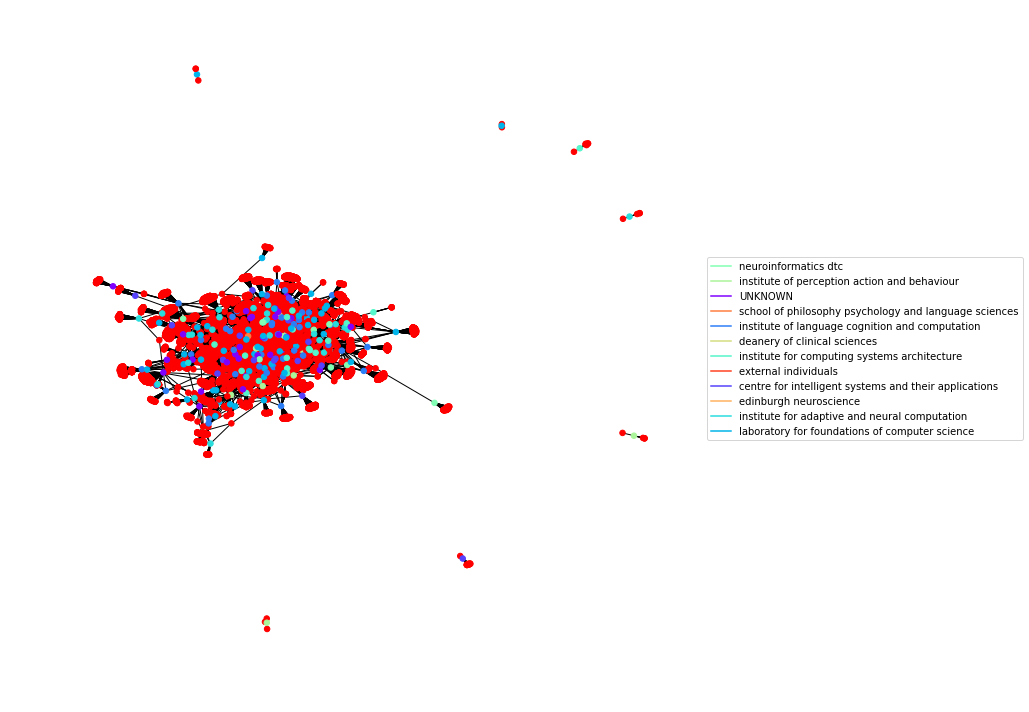

In [41]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax = add_inst_labels(ax)
plt.axis('off')
nx.draw_networkx(
    g_poinf_onetouch,
    node_color=node_color,
    cmap=plt.get_cmap('rainbow'),
    vmin=0,
    vmax=len(institutes),
    ax=ax,
    with_labels=False,
    node_size=30,
    pos=pos)
fig.tight_layout()
plt.show()

In [32]:
Gcc=sorted(nx.connected_component_subgraphs(g_poinf_onetouch), key = len, reverse=True)

In [33]:
len(Gcc)

8

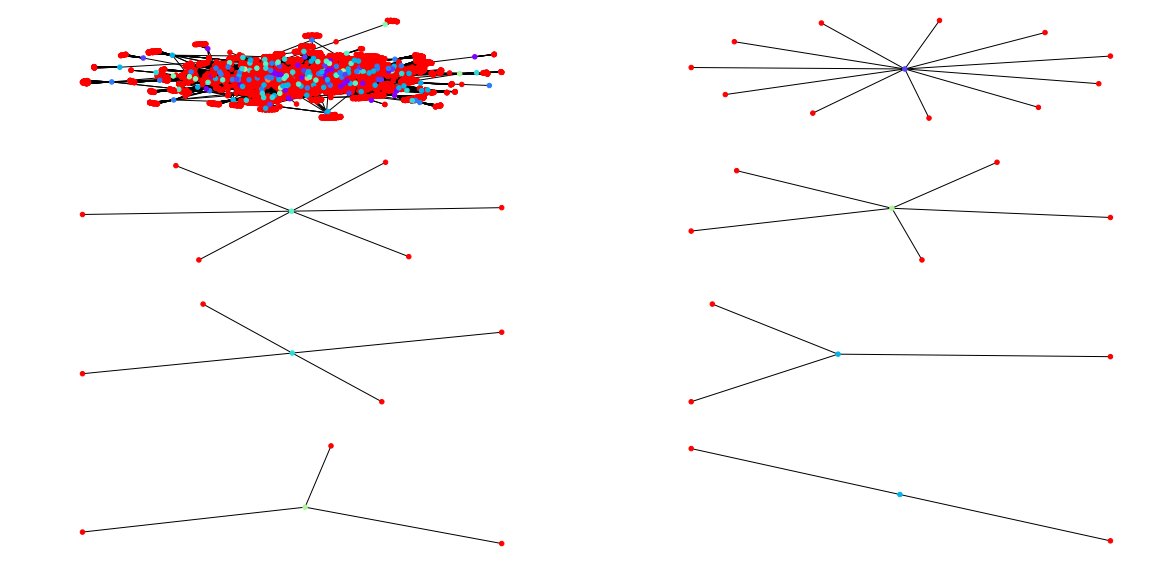

In [54]:
fig2 = plt.figure(figsize=(20, 10))

for i, g in enumerate(Gcc, 1):
    ax = fig2.add_subplot(4, 2, i)
    nx.draw(
        G=g,
        pos=nx.spring_layout(g),
        ax=ax,
        node_color=color_by_inst(g),
        cmap=plt.get_cmap('rainbow'),
        vmin=0,
        vmax=len(institutes),
        with_labels=False,
        node_size=20)

In [46]:
gcc = Gcc[0]

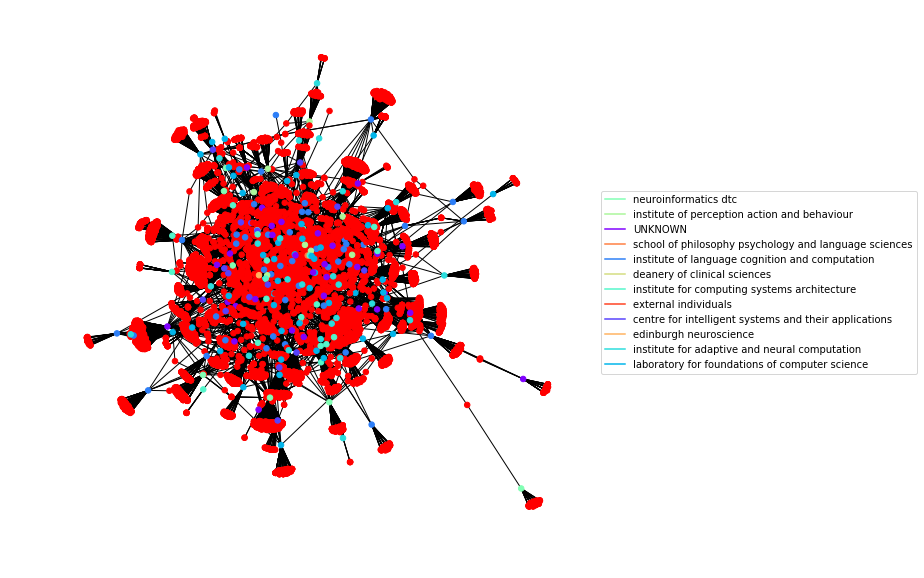

In [53]:
fig3 = plt.figure(figsize=(10, 10))
ax = fig3.add_subplot(111)
ax=add_inst_labels(ax)
nx.draw(
    G=gcc,
    pos=nx.spring_layout(gcc),
    ax=ax,
    node_color=color_by_inst(gcc),
    cmap=plt.get_cmap('rainbow'),
    vmin=0,
    vmax=len(institutes),
    with_labels=False,
    node_size=30)